In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

sns.set_style("white")

current_dir = os.path.abspath("")
data_dir = os.path.abspath("../Data")

data_dir, current_dir

('c:\\Users\\MaxF�rsntr�m-AI23GBG\\djup_maskin\\Deep-Machinelearning\\Data',
 'c:\\Users\\MaxF�rsntr�m-AI23GBG\\djup_maskin\\Deep-Machinelearning\\code_alongs')

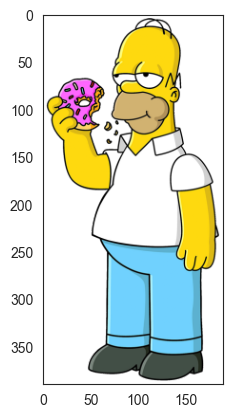

In [27]:
img = plt.imread(f"{data_dir}/Homer_Simpson_2006.png")

plt.imshow(img)


(195, 95, 4)

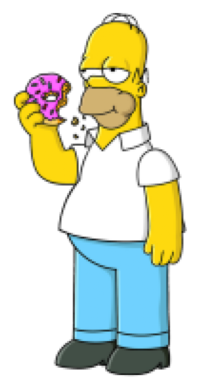

In [28]:
import cv2
resize_factor = .5
new_size = int(img.shape[1]*resize_factor), int(img.shape[0]*resize_factor)

img = cv2.resize(img, new_size)

plt.imshow(img)
plt.axis("off")
img.shape

In [29]:
import numpy as np

edge_filter = np.array([[0,-1,0],
                        [-1,4,-1],
                        [0,-1,0]])

blur_filter = np.array([[.0625, .125, .0625],
                        [.125, .25, .125],
                        [.0625, .125, .0625]])

outline_filter = np.array([[-1,-1,-1],
                           [-1,10,-1],
                           [-1,-1,-1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3568628..2.3813725].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.0..7.0].


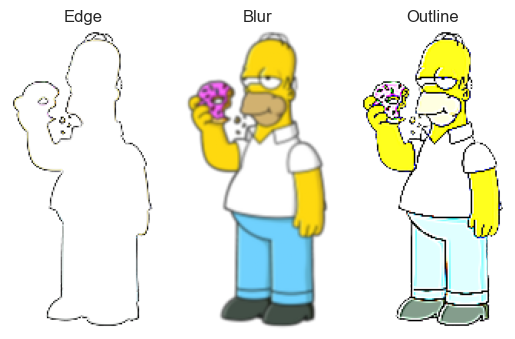

In [30]:
processed_images_path = f"{data_dir}/processed_images"
filters = [edge_filter, blur_filter, outline_filter]
filter_names = ["Edge", "Blur", "Outline"]
try:
    os.mkdir(processed_images_path)
except FileExistsError as err:
    pass
fig, axes = plt.subplots(1, len(filters))

for ax, filter, filter_name in zip(axes, filters, filter_names):
    filtered_img = cv2.filter2D(img, -1, kernel=filter)
    ax.imshow(filtered_img)
    ax.axis("off")
    ax.set(title=f"{filter_name}")

fig.savefig(f"{processed_images_path}/Filtered_images.png")

In [34]:
import keras
from keras import layers
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype("float32") / 255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype("float32") / 255

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.8809 - loss: 0.3758
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9865 - loss: 0.0453
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9913 - loss: 0.0295
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.9936 - loss: 0.0224
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9949 - loss: 0.0161


In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9859 - loss: 0.0444


(0.03409228473901749, 0.9891999959945679)